In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
df.interpolate(method='linear', inplace=True)

<ipython-input-8-a83f336b1194>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [9]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,1
Loan_Amount_Term,0


In [10]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-10-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [11]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

<ipython-input-11-d3b1bb51508f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0], inplace=True)


In [12]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

<ipython-input-12-ff7bb676ed6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


In [13]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

<ipython-input-13-9efd06336c1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,1
Loan_Amount_Term,0


In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-18-fd55fff36a47>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
<ipython-input-18-fd55fff36a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [20]:
df['Dependents'].value_counts()

,count
Dependents,
0,359
1,102
2,101
3+,51


In [21]:
# Replcae 3+ with 4
df=df.replace(to_replace='3+',value=4)

In [22]:
df['Dependents'].value_counts()

,count
Dependents,
0,359
1,102
2,101
4,51


<Axes: xlabel='Loan_Status'>

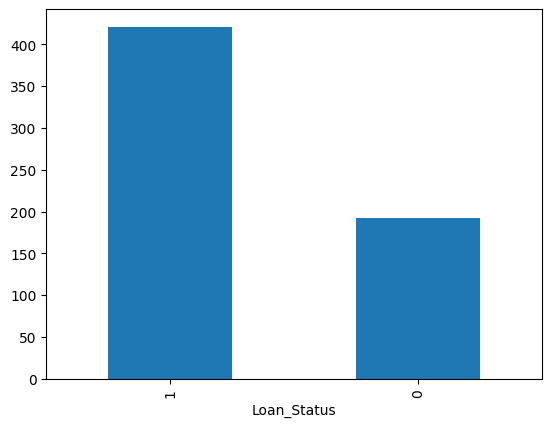

In [23]:
df['Loan_Status'].value_counts().plot.bar()


## Data Visualization

<Axes: xlabel='Education', ylabel='count'>

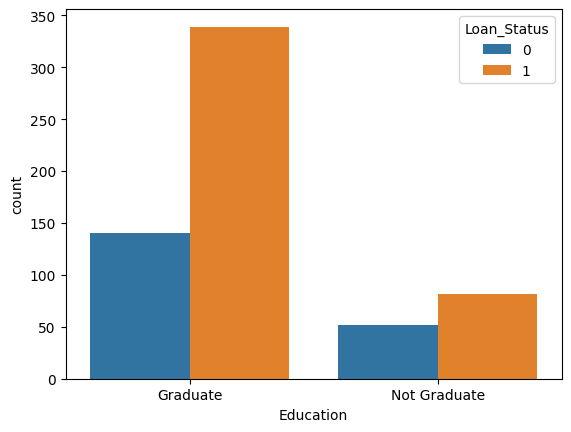

In [24]:
#Education vs Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

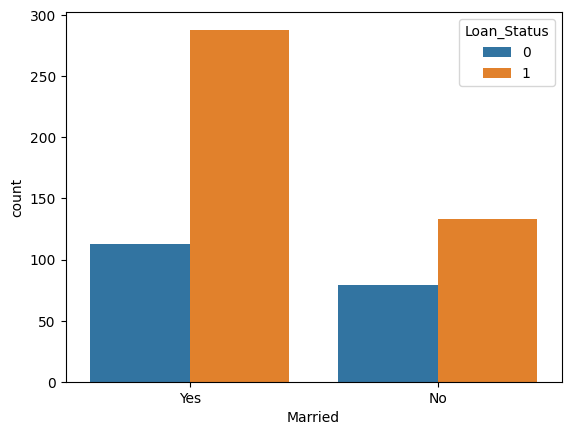

In [25]:
# Maritial Status vs Loan-status

sns.countplot(x='Married',hue='Loan_Status',data=df)

In [26]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-26-d23432944257>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [28]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [29]:
Y=df['Loan_Status']

In [30]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [31]:
Y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


In [32]:
# Train Test Split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [33]:
print(X_train.shape,X_test.shape)

(551, 11) (62, 11)


In [34]:
# Model - Support Vector Machaine Model

In [35]:
classifier=svm.SVC(kernel='linear')

In [36]:
#training

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [37]:
X_train_pred=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)

In [38]:
print(training_data_accuracy)

0.8039927404718693


In [39]:
X_test_pred=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)

In [40]:
print(test_data_accuracy)

0.8225806451612904


In [41]:
import pickle

In [42]:
filename = 'loan_status_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

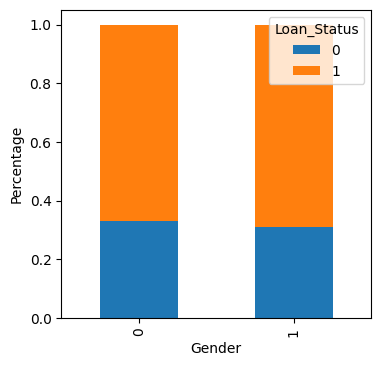

In [43]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import pandas as pd

# Assuming df is already defined and contains the data

# Crosstab for Gender and Loan_Status
Gender = pd.crosstab(df['Gender'], df['Loan_Status'])

# Normalize and plot
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# Adding labels
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Display the plot
plt.show()


Loan_Status
0    5446.078125
1    5382.964371
Name: ApplicantIncome, dtype: float64


<Axes: xlabel='Loan_Status'>

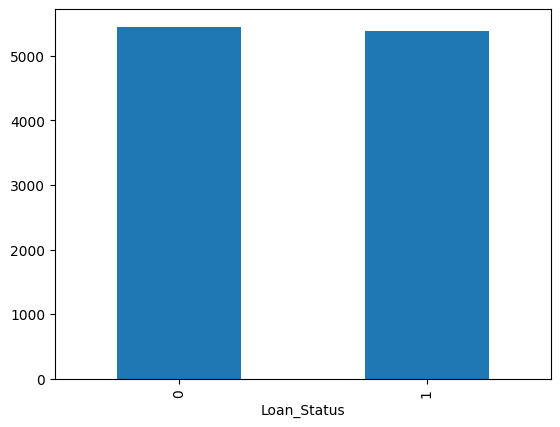

In [44]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

print("Decision Tree Accuracy:", test_data_accuracy)


Decision Tree Accuracy: 0.7580645161290323


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

print("Random Forest Accuracy:", test_data_accuracy)


Random Forest Accuracy: 0.8064516129032258


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

print("Logistic Regression Accuracy:", test_data_accuracy)


Logistic Regression Accuracy: 0.7903225806451613


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

print("KNN Accuracy:", test_data_accuracy)


KNN Accuracy: 0.6774193548387096


In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

print("Naive Bayes Accuracy:", test_data_accuracy)


Naive Bayes Accuracy: 0.8064516129032258


In [50]:
from sklearn.metrics import accuracy_score

# Predict on the training data
X_train_pred = classifier.predict(X_train)

# Calculate and print the accuracy on the training data
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
print(f"Training Data Accuracy: {training_data_accuracy:.2f}")

# Predict on the test data
X_test_pred = classifier.predict(X_test)

# Calculate and print the accuracy on the test data
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
print(f"Test Data Accuracy: {test_data_accuracy:.2f}")


Training Data Accuracy: 0.80
Test Data Accuracy: 0.81


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict on the training data
X_train_pred = classifier.predict(X_train)

# Accuracy, Precision, Recall, F1-score on training data
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
training_precision = precision_score(Y_train, X_train_pred)
training_recall = recall_score(Y_train, X_train_pred)
training_f1 = f1_score(Y_train, X_train_pred)

# Confusion Matrix for training data
training_conf_matrix = confusion_matrix(Y_train, X_train_pred)

# Print training set results
print(f"Training Data Accuracy: {training_data_accuracy:.2f}")
print(f"Training Data Precision: {training_precision:.2f}")
print(f"Training Data Recall: {training_recall:.2f}")
print(f"Training Data F1-Score: {training_f1:.2f}")
print("Training Confusion Matrix:")
print(training_conf_matrix)
print("\n" + "-"*50 + "\n")

# Predict on the test data
X_test_pred = classifier.predict(X_test)

# Accuracy, Precision, Recall, F1-score on test data
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
test_precision = precision_score(Y_test, X_test_pred)
test_recall = recall_score(Y_test, X_test_pred)
test_f1 = f1_score(Y_test, X_test_pred)

# Confusion Matrix for test data
test_conf_matrix = confusion_matrix(Y_test, X_test_pred)

# Print test set results
print(f"Test Data Accuracy: {test_data_accuracy:.2f}")
print(f"Test Data Precision: {test_precision:.2f}")
print(f"Test Data Recall: {test_recall:.2f}")
print(f"Test Data F1-Score: {test_f1:.2f}")
print("Test Confusion Matrix:")
print(test_conf_matrix)


Training Data Accuracy: 0.80
Training Data Precision: 0.80
Training Data Recall: 0.94
Training Data F1-Score: 0.87
Training Confusion Matrix:
[[ 84  89]
 [ 22 356]]

--------------------------------------------------

Test Data Accuracy: 0.81
Test Data Precision: 0.80
Test Data Recall: 0.95
Test Data F1-Score: 0.87
Test Confusion Matrix:
[[ 9 10]
 [ 2 41]]


Confusion Matrix:
[[ 9  2]
 [10 41]]


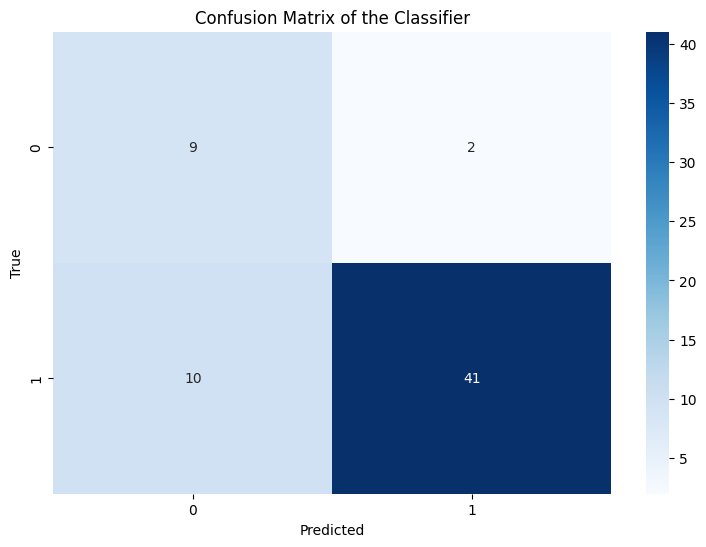

In [52]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_cv is the true labels and pred_cv are the predicted labels
cm = confusion_matrix(X_test_pred, Y_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(9, 6))  # Adjust the size of the plot
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')  # Annotate the matrix with integer values
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [53]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        19
           1       0.80      0.95      0.87        43

    accuracy                           0.81        62
   macro avg       0.81      0.71      0.74        62
weighted avg       0.81      0.81      0.79        62



The performance of our model seems encouraging, with accuracy of 82%, precision of 80% and recall of 95%.

```
# This is formatted as code
```



Let’s make predictions for the test dataset and submit the result.

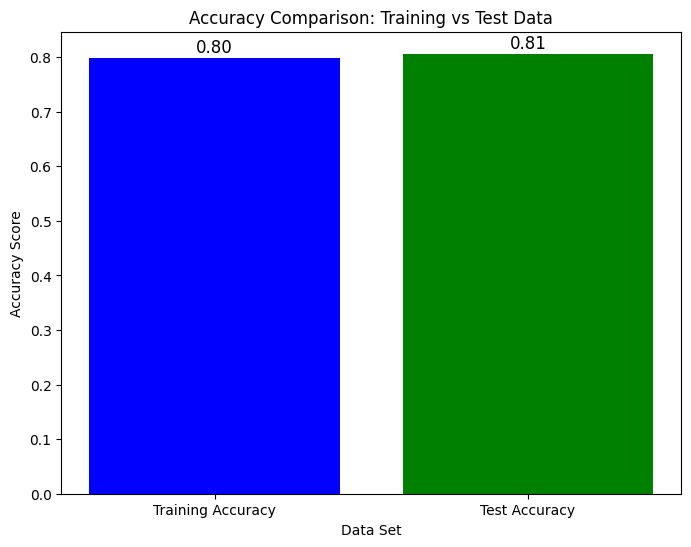

In [54]:
import matplotlib.pyplot as plt

# Assuming training_data_accuracy and test_data_accuracy are already calculated
# and contain the accuracy values for training and test sets

# Data to plot
accuracy_values = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.bar(labels, accuracy_values, color=['blue', 'green'])

# Add title and labels
plt.title('Accuracy Comparison: Training vs Test Data')
plt.xlabel('Data Set')
plt.ylabel('Accuracy Score')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()


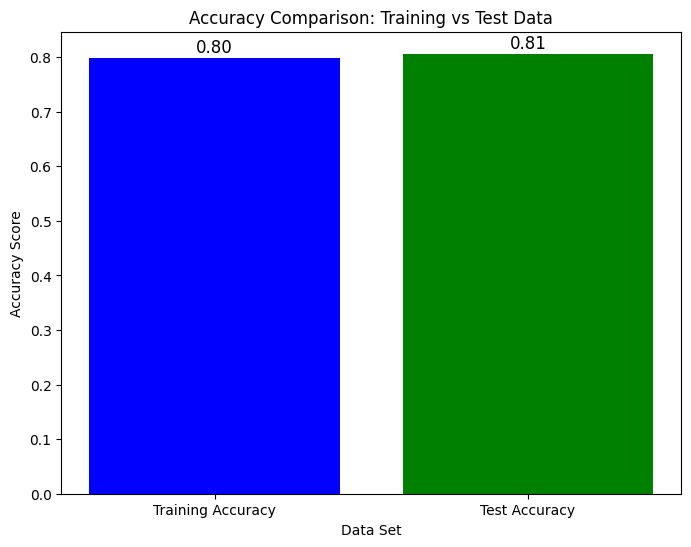

In [55]:
import matplotlib.pyplot as plt

# Assuming you have already calculated training_data_accuracy and test_data_accuracy

# Data to plot
accuracy_values = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.bar(labels, accuracy_values, color=['blue', 'green'])

# Add title and labels
plt.title('Accuracy Comparison: Training vs Test Data')
plt.xlabel('Data Set')
plt.ylabel('Accuracy Score')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()


In [58]:
filename = 'loan_status_model.pkl'  # Name the .pkl file
with open(filename, 'wb') as f:
    pickle.dump(classifier, f)



In [59]:
print(f"Model saved as {filename}")


Model saved as loan_status_model.pkl


In [60]:
from google.colab import files

# Download the model.pkl file
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define and train the model (RandomForestClassifier in this example)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Step 4: Save the trained model as a .pkl file
filename = 'loan_status_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved as {filename}")


Model saved as loan_status_model.pkl


In [68]:
from google.colab import files

# Download the model.pkl file
files.download('loan_status_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>